<a href="https://colab.research.google.com/github/prakruti-sid/Sales-Predictions/blob/main/GrocerySales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
filename = '/content/drive/MyDrive/Dojo Bootcamp/Projects/sales_predictions.csv'
sales_data = pd.read_csv(filename)
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Analysing & Cleaning the Data

In [97]:
# Rows & Columns : 8523 x 12
# Datatypes:

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [98]:
len(sales_data)

8523

In [99]:
len(sales_data.columns)

12

In [100]:
# Duplicates & Missing Values:
# Row 2 : Item_Weight : is missing values
# Row 9 : Outlet_Size is missing values
sales_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [101]:
# Gameplan for Missing Data :
# For Item Weight : Fill in the avg of the particular Item_Type 
#                   If outside normal standard diviation - Will Fill in with a New Category

grouped_itemtype = sales_data.groupby('Item_Type')['Item_Weight'].mean().round(2)
grouped_itemtype
# In case we want a df of the above values:
# itemtype_mean = pd.DataFrame(grouped_itemtype)

Item_Type
Baking Goods             12.28
Breads                   11.35
Breakfast                12.77
Canned                   12.31
Dairy                    13.43
Frozen Foods             12.87
Fruits and Vegetables    13.22
Hard Drinks              11.40
Health and Hygiene       13.14
Household                13.38
Meat                     12.82
Others                   13.85
Seafood                  12.55
Snack Foods              12.99
Soft Drinks              11.85
Starchy Foods            13.69
Name: Item_Weight, dtype: float64

In [102]:
# Lets Add an Item_Type_AvgWgt col to the sales_data :
# *** Reference: https://stackoverflow.com/questions/30244952/how-do-i-create-a-new-column-from-the-output-of-pandas-groupby-sum

sales_data['Item_Type_AvgWgt'] = sales_data['Item_Weight'].groupby(sales_data['Item_Type']).transform('mean').round(2)
sales_data[['Item_Type', 'Item_Weight', 'Item_Type_AvgWgt']]

,Item_Type,Item_Weight,Item_Type_AvgWgt
0,Dairy,9.300,13.43
1,Soft Drinks,5.920,11.85
2,Meat,17.500,12.82
3,Fruits and Vegetables,19.200,13.22
4,Household,8.930,13.38
...,...,...,...
8518,Snack Foods,6.865,12.99
8519,Baking Goods,8.380,12.28
8520,Health and Hygiene,10.600,13.14
8521,Snack Foods,7.210,12.99


In [103]:
# Fill in missing values of Item_Weight with the values in Item_Type_AvgWgt:
# Alternate : df.col1.fillna(df.col2, inplace=True)

sales_data['Item_Weight'].fillna(sales_data['Item_Type_AvgWgt'], inplace = True)

In [104]:
# No missing Values in Item_Weight! :)
sales_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Type_AvgWgt                0
dtype: int64

In [105]:
# Drop Item_Type_AvgWgt Col

sales_data.drop(columns = 'Item_Type_AvgWgt', inplace = True)
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [106]:
# For missing values in Outlet_Size : Replace with mode of Outlet_type

sales_data.groupby(['Outlet_Type', 'Outlet_Size'])['Item_Identifier'].count()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Item_Identifier, dtype: int64

In [107]:
# Replace missing Outlet_Size = Small when Outlet_Type = Grocery Store
#                             = Medium when Outlet_Type = Supermarket Type 2,3
#                             = Medium for all other empty values [ Averaging]
# *** Cite : https://stackoverflow.com/a/63131146/15518683
import numpy as np
missing_mask = sales_data['Outlet_Size'].isna()
mapping_dict = dict({'Grocery Store': 'Small', 'Supermarket Type2' : 'Medium', 'Supermarket Type3' : 'Medium'})
sales_data.loc[missing_mask, 'Outlet_Size'] = sales_data.loc[missing_mask, 'Outlet_Type'].map(mapping_dict)
sales_data['Outlet_Size'] = sales_data['Outlet_Size'].fillna('Medium')


In [108]:
sales_data.groupby(['Outlet_Type', 'Outlet_Size'])['Item_Identifier'].count()

Outlet_Type        Outlet_Size
Grocery Store      Small          1083
Supermarket Type1  High            932
                   Medium         2785
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Item_Identifier, dtype: int64

In [109]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [110]:
# Fixing inconsistent categories of Data:
# Col 2 Item_Fat_Content : Make it uniform
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [111]:
# Changing low fat, LF --> Low Fat
# Changing reg --> Regular

sales_data.replace(['reg'],['Regular'],inplace = True)
sales_data.replace(['LF','low fat'],['Low Fat','Low Fat'], inplace = True)
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [112]:
sales_data['Item_Weight'].describe().round(2)

count    8523.00
mean       12.86
std         4.23
min         4.56
25%         9.31
50%        12.87
75%        16.00
max        21.35
Name: Item_Weight, dtype: float64

In [113]:
sales_data['Item_Visibility'].describe().round(2)

count    8523.00
mean        0.07
std         0.05
min         0.00
25%         0.03
50%         0.05
75%         0.09
max         0.33
Name: Item_Visibility, dtype: float64

In [114]:
sales_data['Item_MRP'].describe().round(2)

count    8523.00
mean      140.99
std        62.28
min        31.29
25%        93.83
50%       143.01
75%       185.64
max       266.89
Name: Item_MRP, dtype: float64

In [115]:
sales_data['Outlet_Establishment_Year'].describe().round(1)

count    8523.0
mean     1997.8
std         8.4
min      1985.0
25%      1987.0
50%      1999.0
75%      2004.0
max      2009.0
Name: Outlet_Establishment_Year, dtype: float64

In [116]:
sales_data['Item_Outlet_Sales'].describe().round(2)

count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

# Exploratory Data Analysis 📊

In [117]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Text(0, 0.5, 'Sales')

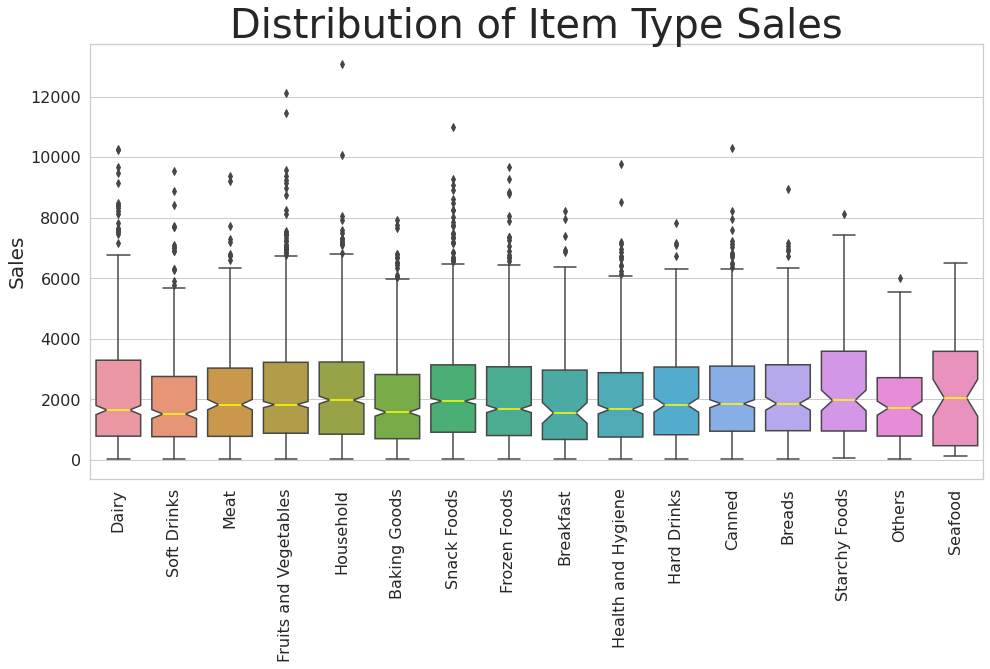

In [119]:
# Boxplot of Item_Fat_Content vs Item_Sales
fig,axes = plt.subplots(figsize = (16,8))
plt.title('Distribution of Item Type Sales', fontsize = 40)
plt.xticks(rotation = 90, fontsize = 16) # Rotate x axis label 90 degrees
plt.yticks(fontsize = 16) 



sns.set_theme(style = 'whitegrid', palette = 'deep')
sns.boxplot(x = 'Item_Type',
            y = 'Item_Outlet_Sales',
            notch = True,
            showfliers = True, # Ignore Outliers ?
            data = sales_data,
            medianprops = {'color':'yellow'})

plt.xlabel('', fontsize = 12); # Modify x axis label
plt.ylabel('Sales', fontsize = 20)

<BarContainer object of 4 artists>

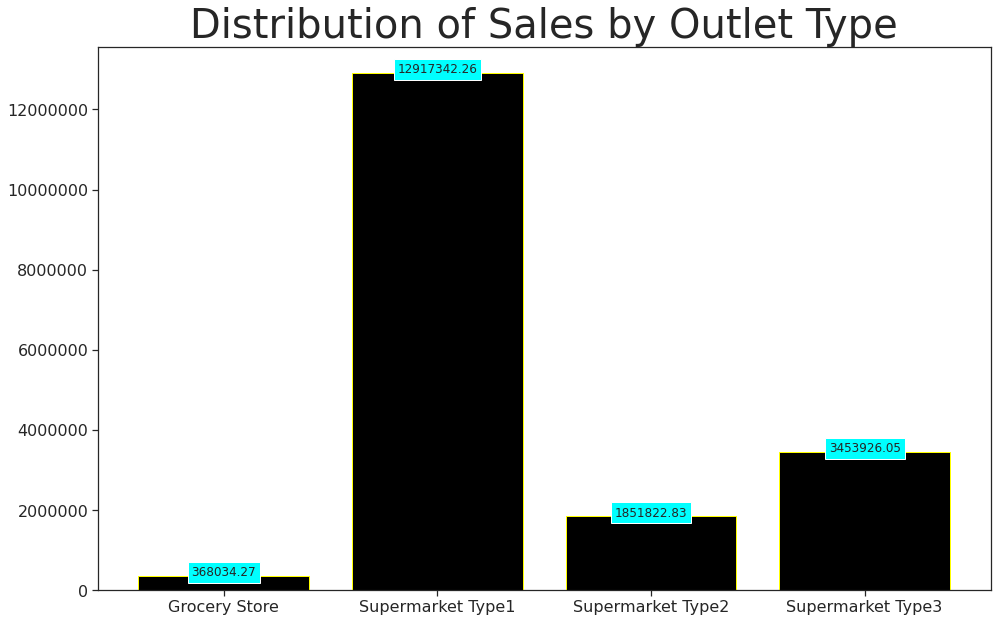

In [256]:
# Outlet Type and  total sales :

df_sales = sales_data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().round(2)

# Barplot a Groupby output and plots bars with labels 

fig,ax = plt.subplots(figsize = (16,10))
ax.set
plt.ticklabel_format(useOffset=False, style ='plain') # Formats labels -- No Scientific notations
# function to add labels :
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'cyan', alpha = 1))

x = df_sales.index # Is how you call groupy output ( Numpy array) into plots
y = df_sales.values

plt.bar(x, y)
addlabels(x,y)

plt.title('Distribution of Sales by Outlet Type', fontsize = 40)
plt.xticks(rotation = 0, fontsize = 16) # Rotate x axis label 90 degrees
plt.yticks(fontsize = 16)

plt.bar(df_sales.index, df_sales.values, color = ('black'), edgecolor = 'yellow')

Text(0.5, 1.0, 'Grocery Outlets Year Established Trend')

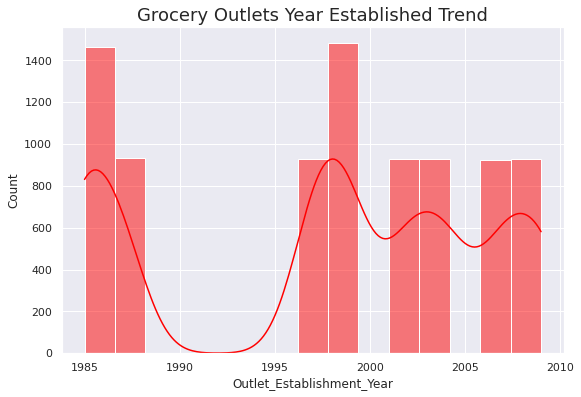

In [259]:
# Histogram of Outlet Established Year :

plt.figure(figsize = (9,6))
sns.set_theme(style='darkgrid')
sns.histplot(x='Outlet_Establishment_Year',
             data = sales_data,
             color = 'red',
             kde = True)
plt.title('Grocery Outlets Year Established Trend', fontsize = 18)

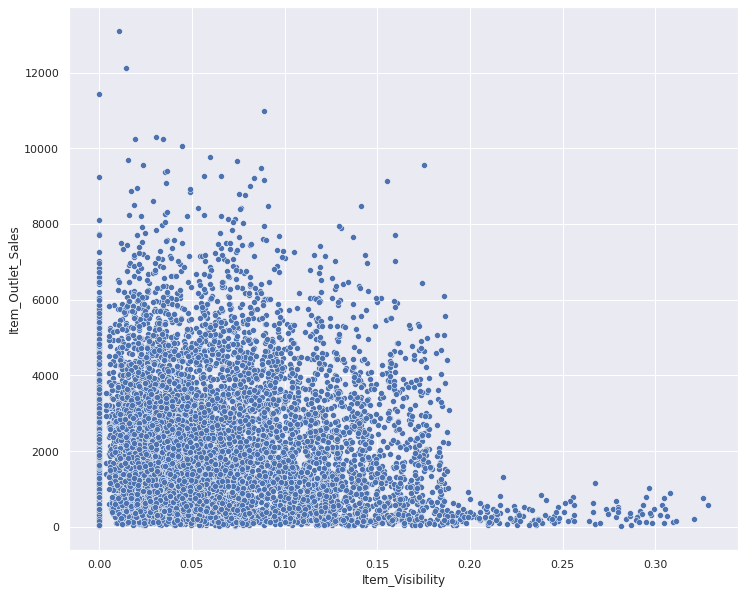

In [265]:
# Correlation between Item Visibility and Item Sales ?

visible_filter = sales_data['Item_Visibility'] 
plt.figure(figsize = (12,10))
sns.scatterplot(x = 'Item_Visibility',
                y = 'Item_Outlet_Sales',
                data = sales_data)

# High Visibility does not imply higher sales

<function matplotlib.pyplot.show>

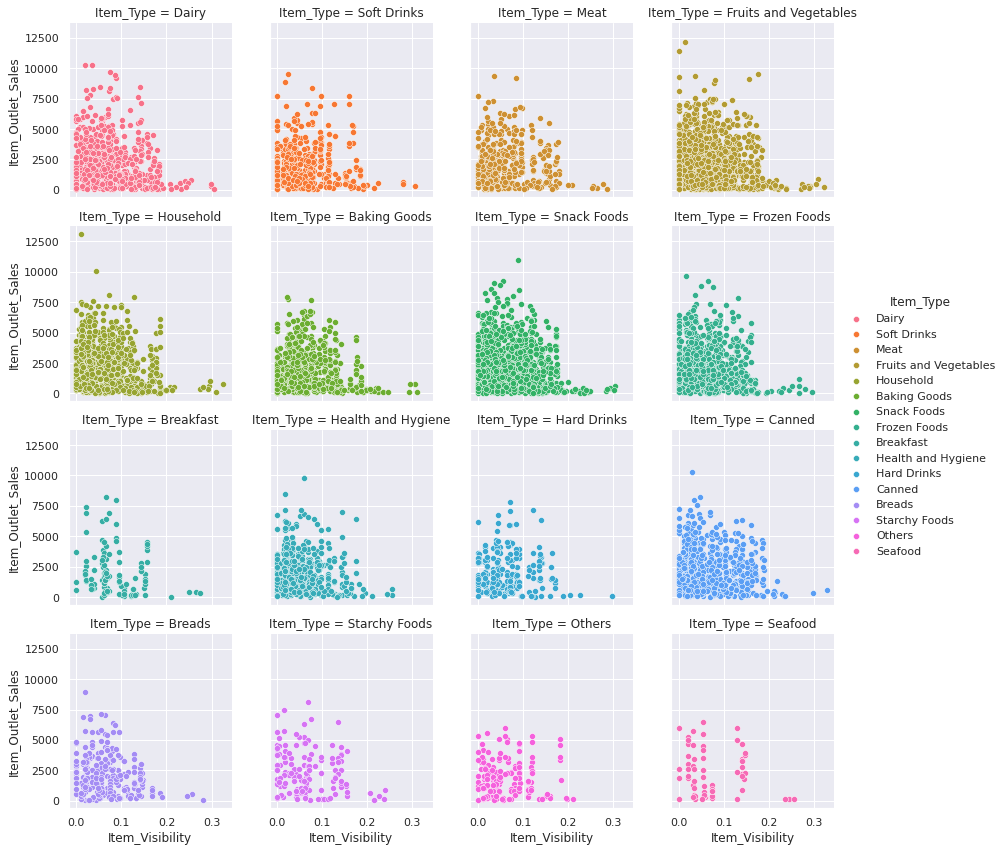

In [272]:
# Drillin in : Item_Visibility & Item Sales grouped by Item Type :

grid = sns.FacetGrid(sales_data, col = 'Item_Type', hue = 'Item_Type', col_wrap = 4)
grid.map(sns.scatterplot, 'Item_Visibility', 'Item_Outlet_Sales')
grid.add_legend()
plt.show

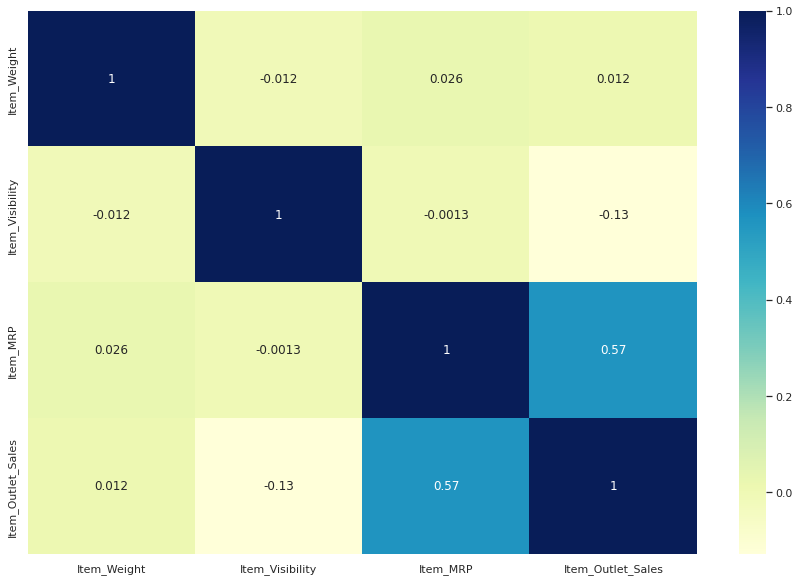

In [283]:
# Heatmap of the dataset :
# Reference : https://cmdlinetips.com/2019/01/how-to-make-heatmap-with-seaborn-in-python/

item_set = sales_data[['Item_Weight', 'Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Item_Outlet_Sales']]
item_corr = item_set.corr()
plt.figure(figsize = (15,10))
sns.heatmap(item_corr, cmap = 'YlGnBu', annot = True)

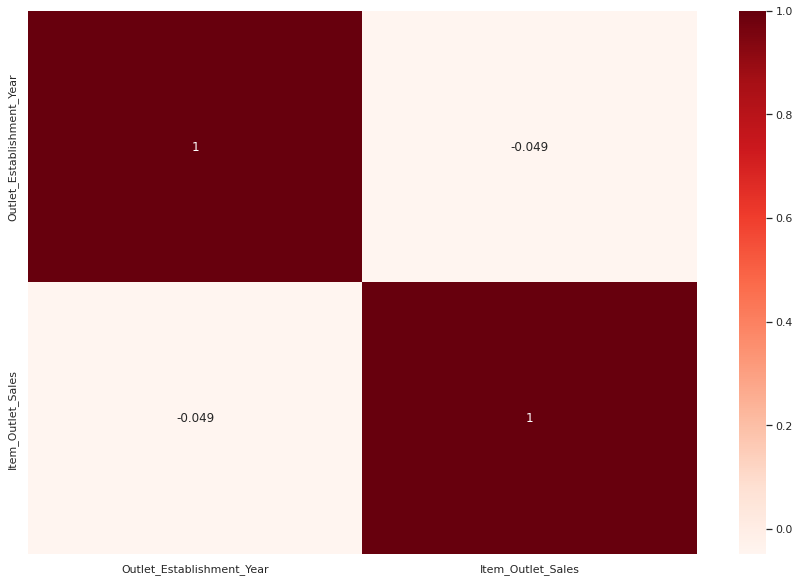

In [291]:
# Heat Map 2 : 
outlet_list = sales_data[['Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]

outlet_heatmap = outlet_list[['Outlet_Establishment_Year','Outlet_Size','Outlet_Type','Item_Outlet_Sales']]
outlet_corr = outlet_heatmap.corr()

plt.figure(figsize = (15,10))
sns.heatmap(outlet_corr, cmap = 'Reds', annot = True)